# Applying Advanced Transformations (Practice)

<p><strong>Welcome to another Core assignment!</strong> Some students like to explore the assignments before they're
	finished reading through the lessons, and that's okay! It can be good for your brain to have a preview of what your
	future challenges might be. However, before you begin this assignment, it's important that you've first:<br></p>
<ul>
	<li>Completed the preceding lesson modules</li>
	<li>Taken the knowledge checks to confirm your understanding</li>
	<li>Viewed lecture material related to the assignment topics</li>
	<li>Completed and submitted your practice assignments</li>
</ul>
<hr>
<h2></h2>
<h1>Applying Advanced Transformations (Practice)</h1>
<p></p>
<figure rel="width: 530px; height: 381px;" style="text-align: center;" class="text-center"><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1688169208__Alargeteamofmaskedsuperheroessavingtheworld.png" style="width: 530px; height: 381px;" width="530" height="381" alt="A large team of super heroes saving the world" title="A large team of super heroes saving the world"></figure>
<p class="text-center"><em>Image Generated in Collaboration with DallE</em></p>
<p></p>
<h3>The Data<a href="http://localhost:8888/notebooks/Assignments/advanced-transformations/Applying%20Advanced%20Transformations%20(CORE).ipynb#The-Data" class="anchor-link"></a></h3>
<p>You will be working with a heavily modified version of the Superheroes dataset from Kaggle.</p>
<p>
The dataset includes two csv's:</p>
<ul><li><a href="https://docs.google.com/spreadsheets/d/e/2PACX-1vS1ZstYLwFgwhZnqDsPjtnlHYhJp_cmW55J8JD5mym0seRsaem3px7QBtuFF0LiI7z1PLCkVKAkdO7J/pub?output=csv" target="_blank">superhero_info.csv:</a><ul><li>Contains Name, Publisher, Demographic Info, and Body measurements.</li></ul></li></ul>
<ul><li><a href="https://docs.google.com/spreadsheets/d/e/2PACX-1vSzdWOBaXOoz52vPmCFV5idNlDBohLY1Lsbc1IfZIZQ7cV_aNB2wYBfhF49uE1TaO1B5MQCGWiNrFfd/pub?output=csv" target="_blank">superhero_powers.csv</a>:<ul><li>Contains Hero name and list of powers</li></ul></li></ul>
<h2>The Task</h2>
<p>Your task is two-fold:</p>
<p><strong>I. Clean the files and combine them into one final DataFrame.</strong></p>
<ul><li>This dataframe should have the following columns:<ul><li>Hero (Just the name of the Hero)</li><li>Publisher</li><li>Gender</li><li>Eye color</li><li>Race</li><li>Hair color</li><li>Height (numeric)</li><li>Skin color</li><li>Alignment</li><li>Weight (numeric)</li><li>Plus, one-hot-encoded columns for every power that appears in the dataset.
E.g.:<ul><li>Agility</li><li>Flight</li><li>Superspeed</li><li>etc.</li></ul></li></ul></li></ul>
<p>Hint: There is a space in "100 kg" or "52.5 cm"</p>
<p><br></p>
<p><strong>II. Use your combined DataFrame to answer the following questions.</strong></p>
<ol><li>Compare the average weight of super powers who have Super Speed to those who do not.</li><li>What is the average height of heroes for each publisher?</li></ol>
<p><br></p>
<p>(<a href="https://www.kaggle.com/datasets/claudiodavi/superhero-set" target="_blank">Source</a>)</p>
<p>Submit your notebook or a link to a GitHub repository with your work.</p>

# Solution

## I. Clean the files and combine them

In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
hero = pd.read_csv("Data/superhero_info - superhero_info.csv")
hero.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
power = pd.read_csv("Data/superhero_powers - superhero_powers.csv")
power.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


### Cleaning Hero Info

In [4]:
# separate hereo/publisher on the |
hero['Hero|Publisher'].str.split('|', expand = True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [5]:
# Add split columns to hero df with appropriate names
hero[['Hero', 'Publisher']] = hero['Hero|Publisher'].str.split('|', expand = True)
hero.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [6]:
# drop the original column
hero = hero.drop(columns=['Hero|Publisher'])
hero.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [7]:
# Separate Measurements into 2 columns
# It looks like a dictionary
hero.loc[0, 'Measurements']

"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [8]:
# The quotes indicate that this is a string
# To use JSON,we will have to change the single quotes to double quotes

hero['Measurements'] = hero['Measurements'].str.replace("'", '"')

In [9]:
hero['Measurements'] = hero['Measurements'].apply(json.loads)
hero.loc[0, 'Measurements']

{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [10]:
# Now that we have an actual dicitonary, we can unpack it into separate columns
height_weight = hero['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [11]:
# Now we can add these columns to the original hero df
hero = pd.concat((hero, height_weight), axis = 1)
hero.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [12]:
# Let's drop the orignal Measurements column
hero = hero.drop(columns=['Measurements'])
hero.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [13]:
# Now we need to make height and weight numeric, so we have to remove the units and the space
hero['Height'] = hero['Height'].str.replace(' cm', '')
hero['Height'].head(2)

0    203.0
1    191.0
Name: Height, dtype: object

In [14]:
# Convert height to numeric
hero['Height'] = pd.to_numeric(hero['Height'])

In [15]:
# Remove the units from weight
hero['Weight'] = hero['Weight'].str.replace(' kg', '')
hero['Weight'].head(2)

0    441.0
1     65.0
Name: Weight, dtype: object

In [16]:
# Convert weight to numeric
hero['Weight'] = pd.to_numeric(hero['Weight'])

In [17]:
# Confirm Hero Dtypes
hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      463 non-null    object 
 1   Race        463 non-null    object 
 2   Alignment   463 non-null    object 
 3   Hair color  463 non-null    object 
 4   Eye color   463 non-null    object 
 5   Skin color  463 non-null    object 
 6   Hero        463 non-null    object 
 7   Publisher   463 non-null    object 
 8   Height      463 non-null    float64
 9   Weight      463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


### Cleaning Hero Powers

In [18]:
# Now we need to one hot encode powers
power['Powers'].head(2)

0           Agility,Super Strength,Stamina,Super Speed
1    Accelerated Healing,Durability,Longevity,Super...
Name: Powers, dtype: object

In [19]:
power.loc[0, 'Powers']

'Agility,Super Strength,Stamina,Super Speed'

In [20]:
# it is a string
# We can just split it on the ","
# We are not saying expand = True but we might need to clarify this
power['powers_split'] = power['Powers'].str.split(',')
power['powers_split'].head()

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
2    [Agility, Accelerated Healing, Cold Resistance...
3                                 [Lantern Power Ring]
4    [Accelerated Healing, Intelligence, Super Stre...
Name: powers_split, dtype: object

In [21]:
# Explode the dataframe to make a new row for each power for each hero
exploded = power.explode('powers_split')
exploded.head()

,hero_names,Powers,powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [22]:
# Save the list of unique values from the exploded column
cols_to_make = exploded['powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [23]:
# Loop through power dataframe and create col for each power
for col in cols_to_make:
    power[col] = power['Powers'].str.contains(col).copy() # added .copy() to suppress warning
power.head()

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_24805/1819760185.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  power[col] = power['Powers'].str.contains(col).copy() # added .copy() to suppress warning
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_24805/1819760185.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  power[col] = power['Powers'].str.contains(col).copy() # added .copy() to suppress warning
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_24805/1819760185.py:3: PerformanceWarni

,hero_names,Powers,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Combine the Cleaned DataFrames

In [24]:
# now we need to combine the hero and power dataframes into one
merged = pd.merge (hero, power, left_on = 'Hero', right_on = 'hero_names')
merged.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


### Answer the Questions

#### Compare the average weight of super powers who have Super Speed to those who do not.

In [25]:
# Compare the average weight of super powers who have Super Speed to those who do not.
merged.groupby('Super Speed')['Weight'].mean()

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

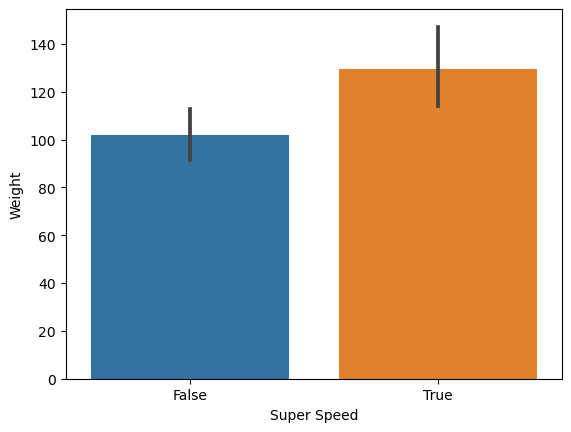

In [26]:
sns.barplot(data=merged, x='Super Speed',y='Weight');

1. On average, super heroes with super speed are heavier than those without super speed.

#### 2) What is the average height of heroes for each publisher?

In [27]:
#2 What is the average height of heroes for each publisher?
merged.groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

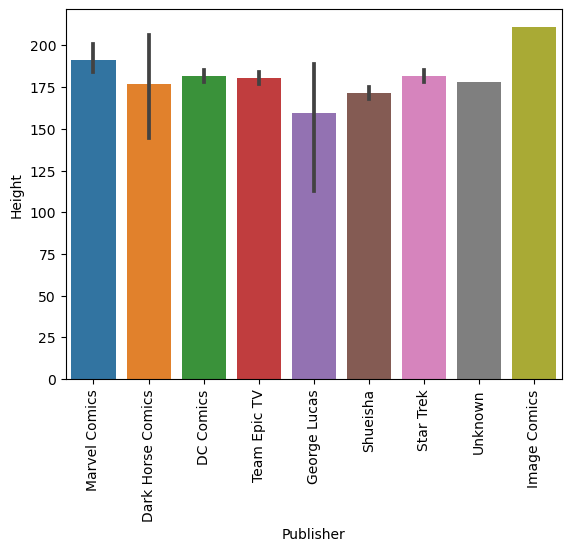

In [28]:
ax = sns.barplot(data=merged, x='Publisher',y='Height')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

2. On average, Image Comics has the tallest super heroes.